# OpenScope's Dendritic Coupling Dataset

Predictive coding hypotheses posit that perception is an active process whereby brain regions predict incoming sensory inputs, against which they are compared by other neural populations.  Mismatches between predictions and inputs result in error signals that can then be used to update the predictive model encoded in synaptic weights, thereby driving plasticity. Although increasing amounts of evidence are consistent with the general framework, many different algorithmic implementations have been proposed, requiring further experiments to test specific corollaries of these varied approaches.  One important, testable implication distinguishing some current theories involves the coupling strength in L2/3 and L5 pyramidal neurons between distal apical dendrites, which tend to receive top-down inputs that may include sensory prediction data, and their conjoined somata, which are often driven by bottom-up inputs. In particular, error signals are computed or else collocated in apical dendrites in some implementations, resulting in a quiescent subunit when the prediction matches inputs—zero error—and, thus, reduced dendro-somatic coupling during such times. In contrast, a separate proposal implies the opposite: Since many apical dendritic voltage signals can only reach their electrotonically segregated soma when facilitated by bursting induced by concurrent somatic sensory inputs, dendro-somatic coupling would instead be strongest when top-down predictions match bottom-up signals.

Our experiment seeks to test these hypotheses by near-simultaneously imaging L2/3 and L5 somata and distal apical dendrites in mouse V1, LM, PM, and AM in transgenic lines that express GCaMP6f.  Imaging four distinct areas allows us to also examine the consistency of the coupling rules, further putting the notion of a cortical canonical microcircuit to the test.  By habituating animals to sets of visual stimuli with spatiotemporal patterns that are subsequently violated, we can evaluate the neural responses across the visual cortical hierarchy to help in adjudicating these important neuroscientific questions.


![dendritic_coupling_fig3](../../data/images/dendritic_coupling_fig3.png)

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [1]:
try:
    from dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .
    %cd docs/projects

c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_interactions import hyperslicer
from scipy import interpolate
from scipy.stats import ttest_ind

%matplotlib inline

### The Experiment
For this release of Dendritic Coupling, Openscope has pre-released just 2 mice on the [DANDI Archive](http://dandiarchive.org). The following table gives a summary of all the files from those two mice in this dataset. Eight files are produced from each experimental session, one for each imaging plane, and six sessions are conducted with each mouse, totalling 96 files for this dandiset. This table was generated from [Getting Experimental Metadata from DANDI](../basics/get_dandiset_metadata.ipynb).

In [3]:
session_files = pd.read_csv("../../data/dc_sessions.csv")
session_files

identifier        size  \
0   2b16c329-a2f2-44c0-917f-d2485eca5fb7  4008765509   
1   c1a7d88e-2a7d-463e-a73d-b46eaea61593  1079474009   
2   dff85610-18b0-4d72-8ebd-5639516fe0b7  1073642857   
3   ee3b7520-6ac7-49ea-88b3-022d5be7816b  1069138065   
4   a81fd01e-36be-4eff-a3f1-379201a95bf4  1144934234   
..                                   ...         ...   
91  42b35234-d4dd-49cb-85c2-08a201ce826e  4041517083   
92  9661ce3c-372a-4f00-8db8-a68184fbc607  4014625264   
93  aace7ef8-742f-4382-b53d-938e30c25fc9  4014619723   
94  667eb4f7-88ab-4d19-bfc1-3f9e789f5c20  4043804172   
95  8f9bd3ef-120d-4f5c-9498-ec79d477d447  4016954448   

                                                 path  \
0   sub-644972/sub-644972_ses-1238929581-acq-12391...   
1   sub-644972/sub-644972_ses-1237338784-acq-12378...   
2   sub-644972/sub-644972_ses-1237338784-acq-12378...   
3   sub-644972/sub-644972_ses-1237338784-acq-12378...   
4   sub-644972/sub-644972_ses-1237338784-acq-12378...   
..                                                ...   
91  sub-656228/sub-656228_ses-1247233186-acq-12473...   
92  sub-656228/sub-656228_ses-1247233186-acq-12473...   
93  sub-656228/sub-656228_ses-1247233186-acq-12473...   
94  sub-656228/sub-656228_ses-1247233186-acq-12473...   
95  sub-656228/sub-656228_ses-1247233186-acq-12473...   

                        session_time  session_id  experiment_id  container_id  \
0   2023-01-11 16:33:05.503000+00:00  1238929581     1239101628             0   
1   2023-01-04 16:58:58.862000+00:00  1237338784     1237809217             0   
2   2023-01-04 16:58:58.862000+00:00  1237338784     1237809220             0   
3   2023-01-04 16:58:58.862000+00:00  1237338784     1237809223             0   
4   2023-01-04 16:58:58.862000+00:00  1237338784     1237809219             0   
..                               ...         ...            ...           ...   
91  2023-02-14 21:44:00.768000+00:00  1247233186     1247385130             0   
92  2023-02-14 21:44:00.768000+00:00  1247233186     1247385137             0   
93  2023-02-14 21:44:00.768000+00:00  1247233186     1247385131             0   
94  2023-02-14 21:44:00.768000+00:00  1247233186     1247385136             0   
95  2023-02-14 21:44:00.768000+00:00  1247233186     1247385128             0   

    group  group_count  imaging_depth location  fov_height  fov_width  \
0       3            4            288    VISpm         512        512   
1       0            4             20     VISp         512        512   
2       1            4             25    VISam         512        512   
3       2            4             30     VISl         512        512   
4       0            4            295     VISp         512        512   
..    ...          ...            ...      ...         ...        ...   
91      0            4            152     VISp         512        512   
92      3            4             46    VISpm         512        512   
93      1            4             50    VISam         512        512   
94      2            4            144     VISl         512        512   
95      0            4             42     VISp         512        512   

    specimen_name sex      age  \
0          644972   M  P162.0D   
1          644972   M  P155.0D   
2          644972   M  P155.0D   
3          644972   M  P155.0D   
4          644972   M  P155.0D   
..            ...  ..      ...   
91         656228   M  P109.0D   
92         656228   M  P109.0D   
93         656228   M  P109.0D   
94         656228   M  P109.0D   
95         656228   M  P109.0D   

                                             genotype  \
0   Rbp4-Cre_KL100/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...   
1   Rbp4-Cre_KL100/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...   
2   Rbp4-Cre_KL100/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...   
3   Rbp4-Cre_KL100/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...   
4   Rbp4-Cre_KL100/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...   
..                                                ...   
91  Cux2-CreER

In [4]:
n_sessions = len(session_files["session_id"].value_counts())
subjects_info = session_files.groupby(["specimen_name", "sex"]).size().reset_index().to_dict()
m_count = len([sex for sex in subjects_info["sex"].values() if sex == "M"])
f_count = len([sex for sex in subjects_info["sex"].values() if sex == "F"])

print("Dandiset Overview:")
print(len(session_files), "files")
print(len(subjects_info["specimen_name"]), "subjects", m_count, "males", f_count,"females")

Dandiset Overview:
96 files
2 subjects 2 males 0 females


### Downloading Ophys File

In [5]:
dandiset_id = "000871"
dandi_filepath = "sub-656228/sub-656228_ses-1245548523-acq-1245937736_image+ophys.nwb"
download_loc = "."

In [6]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc)
nwb = io.read()

A newer version (0.59.0) of dandi/dandi-cli is available. You are using 0.55.1


File already exists
Opening file


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.3.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Imaging Data
Our Ophys files include lab metadata and imaging_planes objects which ential the information about the location being imaged, shown below.

In [7]:
nwb.lab_meta_data

{'metadata': metadata abc.OphysMetadata at 0x2699743306368
 Fields:
   experiment_container_id: 0
   field_of_view_height: 512
   field_of_view_width: 512
   imaging_depth: 144
   imaging_plane_group: 3
   imaging_plane_group_count: 4
   ophys_experiment_id: 1245937736
   ophys_session_id: 1245548523}

In [8]:
nwb.imaging_planes

{'imaging_plane_1': imaging_plane_1 pynwb.ophys.ImagingPlane at 0x2699745402736
 Fields:
   conversion: 1.0
   description: (512, 512) field of view in VISpm at depth 144 um
   device: MESO.2 pynwb.device.Device at 0x2699745400768
 Fields:
   description: Allen Brain Observatory - Mesoscope 2P Rig
 
   excitation_lambda: 910.0
   imaging_rate: 10.0
   indicator: GCaMP6f
   location: VISpm
   optical_channel: (
     channel_1 <class 'pynwb.ophys.OpticalChannel'>
   )
   unit: meters}

### Stimulus Templates
The files for the Dendritic Coupling project contain the movies used as visual stimulus, referred to as stim templates. The project contain three main stimulus movies with regular forward playback. Some files in the project, such as this one, have reverse, forward-reverse, and reverse-forward versions as well. Below, screenshots from each of the movies are displayed, and one of the movies can be played embedded within this notebook. The key used can be changed to view different stim templates.

In [9]:
nwb.stimulus_template.keys()

dict_keys(['flower_fwd', 'flower_fwd_rev', 'flower_rev', 'flower_rev_fwd', 'touch_of_evil_fwd', 'touch_of_evil_fwd_rev', 'touch_of_evil_rev', 'touch_of_evil_rev_fwd', 'worms_fwd', 'worms_fwd_rev', 'worms_rev', 'worms_rev_fwd'])

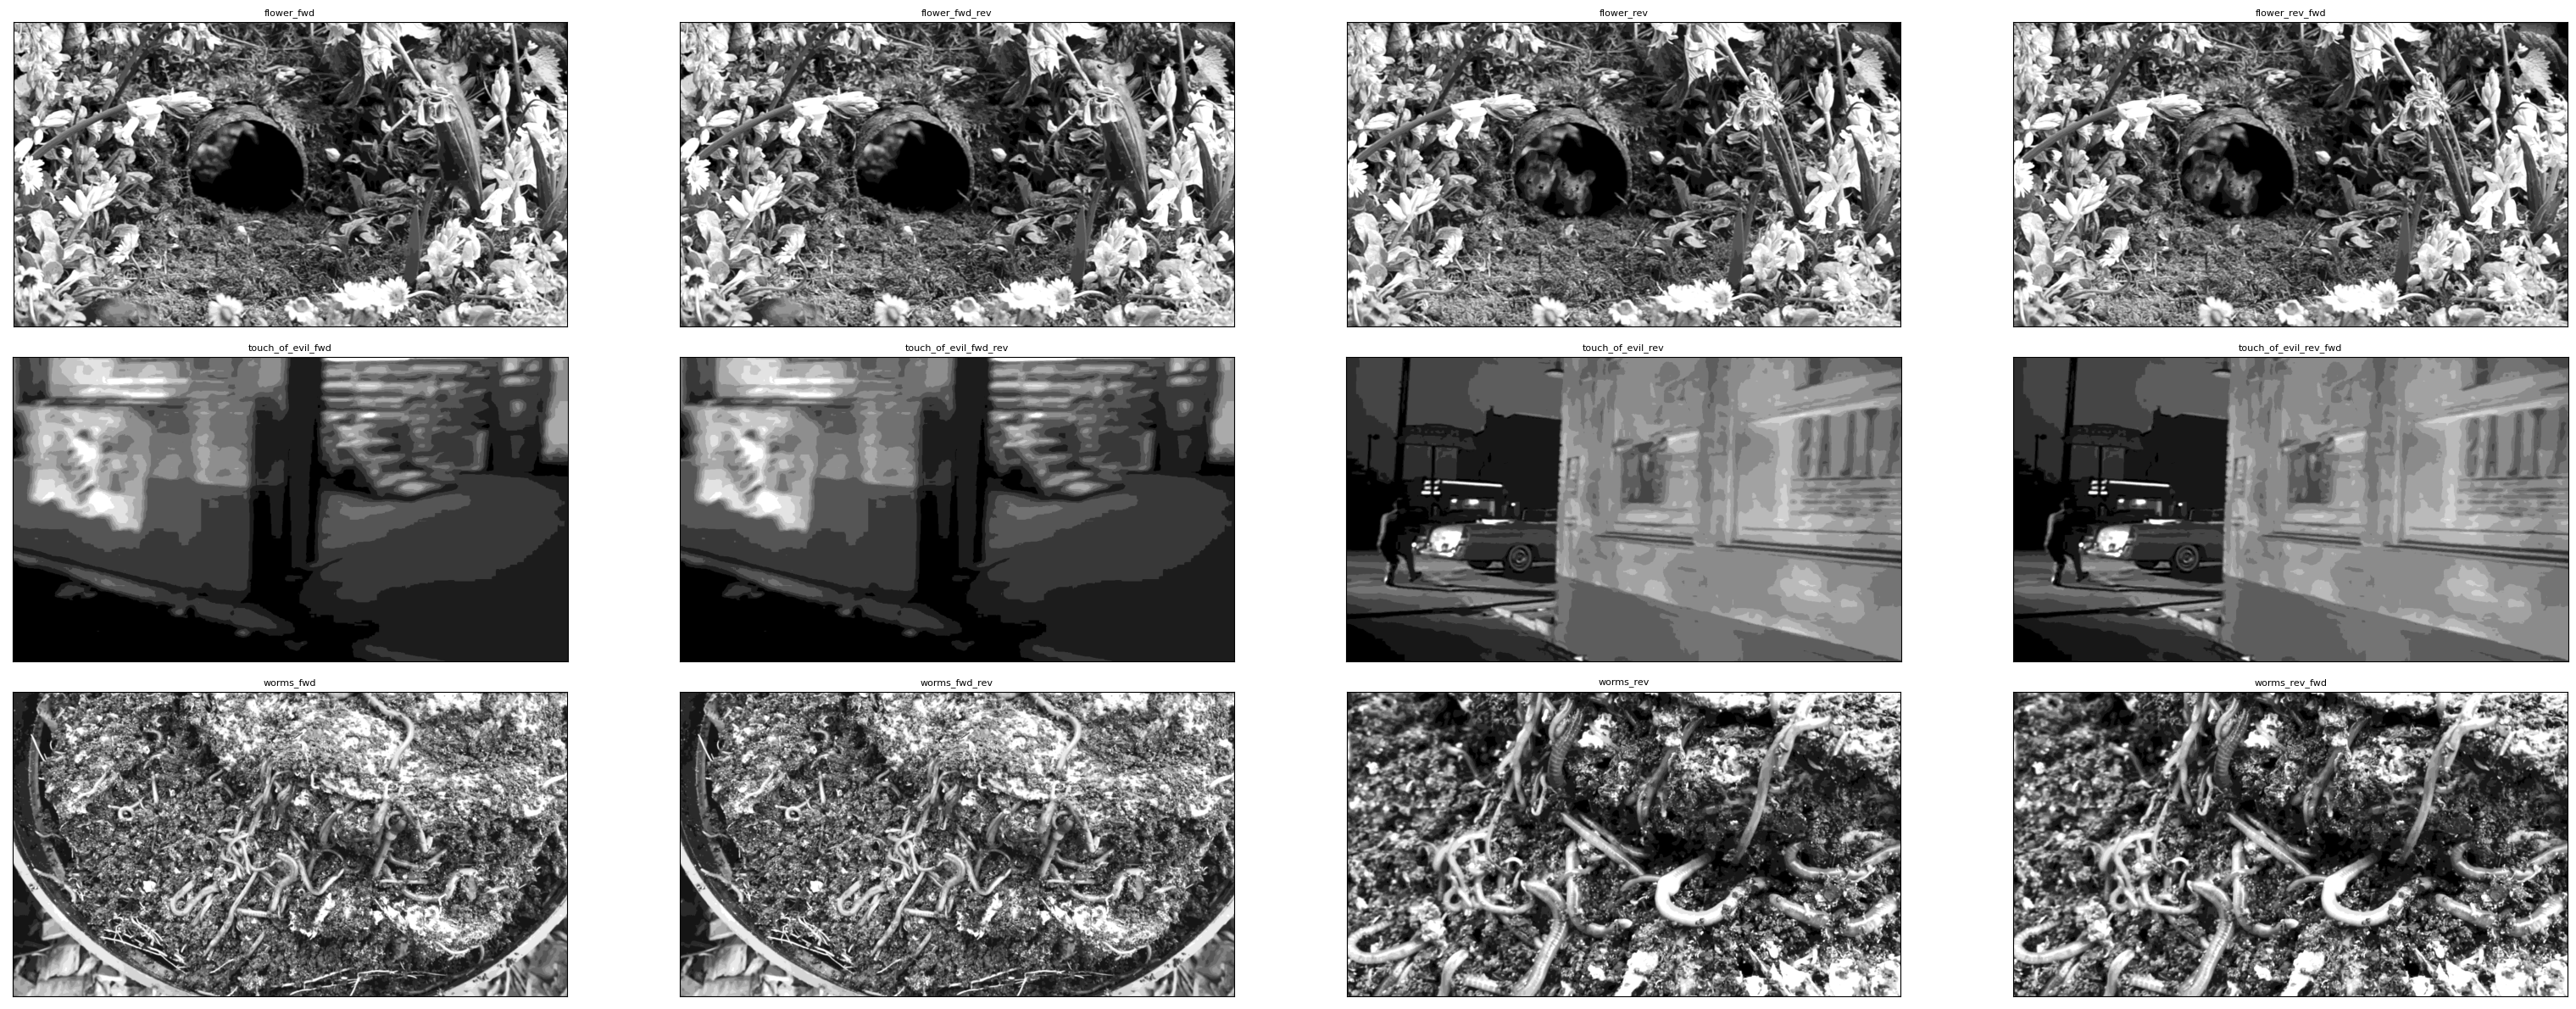

In [10]:
n_cols = 4
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))

if len(axes.shape) == 1:
    axes = axes.reshape((1, axes.shape[0]))

for i, template_name in enumerate(nwb.stimulus_template.keys()):
    template_img = nwb.stimulus_template[template_name].data[:,:,0]
    template_img = np.rot90(template_img, k=3)

    ax_row = int(i / n_cols)
    ax_col = i % n_cols
    axes[ax_row][ax_col].imshow(template_img, cmap="gray")
    axes[ax_row][ax_col].set_title(template_name, fontsize=8)

for ax in axes.flat:
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

fig.tight_layout()

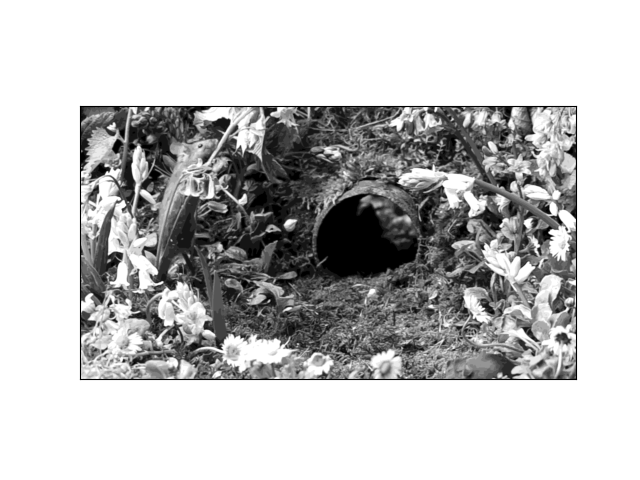

In [11]:
%matplotlib ipympl
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# change this key to view other stim template movies
template_key = "flower_fwd_rev"
template = nwb.stimulus_template[template_key].data
template = np.transpose(template)
view = hyperslicer(template, play_buttons=True, cmap="gray")

### Selecting Stimulus Times

In [12]:
nwb.intervals.keys()

dict_keys(['fixed_gabors_presentations', 'gratings_presentations', 'movie_flower_fwd_presentations', 'movie_flower_fwd_rev_presentations', 'movie_flower_rev_fwd_presentations', 'movie_flower_rev_presentations', 'movie_touch_of_evil_fwd_presentations', 'movie_touch_of_evil_fwd_rev_presentations', 'movie_touch_of_evil_rev_fwd_presentations', 'movie_touch_of_evil_rev_presentations', 'movie_worms_fwd_presentations', 'movie_worms_fwd_rev_presentations', 'movie_worms_rev_fwd_presentations', 'movie_worms_rev_presentations', 'rotate_gabors_presentations', 'spontaneous_presentations'])

In [13]:
stim_table = nwb.intervals["movie_worms_fwd_rev_presentations"]
print(stim_table.colnames)
stim_table[:10]

('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'color', 'contrast', 'opacity', 'orientation', 'size', 'units', 'stimulus_index', 'tags', 'timeseries')


start_time  stop_time        stimulus_name  stimulus_block  frame  \
id                                                                      
0    133.87838  133.91170  movie_worms_fwd_rev             7.0    0.0   
1    133.91170  133.94513  movie_worms_fwd_rev             7.0    1.0   
2    133.94513  133.97842  movie_worms_fwd_rev             7.0    2.0   
3    133.97842  134.01179  movie_worms_fwd_rev             7.0    3.0   
4    134.01179  134.04522  movie_worms_fwd_rev             7.0    4.0   
5    134.04522  134.07857  movie_worms_fwd_rev             7.0    5.0   
6    134.07857  134.11187  movie_worms_fwd_rev             7.0    6.0   
7    134.11187  134.14529  movie_worms_fwd_rev             7.0    7.0   
8    134.14529  134.17865  movie_worms_fwd_rev             7.0    8.0   
9    134.17865  134.21195  movie_worms_fwd_rev             7.0    9.0   

              color  contrast  opacity  orientation              size units  \
id                                                                            
0   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
1   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
2   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
3   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
4   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
5   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
6   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
7   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
8   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   
9   [1.0, 1.0, 1.0]       1.0      1.0          0.0  [1920.0, 1080.0]   pix   

    stimulus_index                      tags  \
id                                             
0             10.0  [stimulus_time_interval]   
1             10.0  [stimulus_time_interval]   
2             10.0  [stimulus_time_interval]   
3             10.0  [stimulus_time_interval]   
4             10.0  [stimulus_time_interval]   
5             10.0  [stimulus_time_interval]   
6             10.0  [stimulus_time_interval]   
7             10.0  [stimulus_time_interval]   
8             10.0  [stimulus_time_interval]   
9             10.0  [stimulus_time_interval]   

                                           timeseries  
id                                                     
0   [(6000, 2, timestamps pynwb.base.TimeSeries at...  
1   [(6002, 2, timestamps pynwb.base.TimeSeries at...  
2   [(6004, 2, timestamps pynwb.base.TimeSeries at...  
3   [(6006, 2, timestamps pynwb.base.TimeSeries at...  
4   [(6008, 2, timestamps pynwb.base.TimeSeries at...  
5   [(6010, 2, timestamps pynwb.base.TimeSeries at...  
6   [(6012, 2, timestamps pynwb.base.TimeSeries at...  
7   [(6014, 2, timestamps pynwb.base.TimeSeries at...  
8   [(6016, 2, timestamps pynwb.base.TimeSeries at...  
9   [(6018, 2, timestamps pynwb.base.TimeSeries at...

In [14]:
print(np.mean(np.diff(stim_table.start_time)))
print(set(stim_table.frame))

0.4026468757717955
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0

In [15]:
# flower video reverses around frame 190
rev_stim_select = lambda row: row.frame.item() == 190
rev_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if rev_stim_select(stim_table[i])]
print(len(rev_stim_times))

15


### Extracting ROI Fluorescence

In [16]:
dff = nwb.processing["ophys"]["dff"]
dff_trace = dff.roi_response_series["traces"].data
dff_timestamps = dff.roi_response_series["traces"].timestamps

print(dff_trace.shape)
print(dff_timestamps.shape)

avg_dff_trace = np.average(dff_trace, axis=1)

(37515, 27)
(37515,)


### Session Timeline
To get a good idea of the order and the way stimulus is shown throughout the session, the code below generates a timeline of the various 'epochs' of stimulus. It can be seen that there are many small epochs showing the various stimulus movies in the first half of the session, followed by a long epoch of rotating gabors and then a long epoch of fixed gabors.

In [17]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [18]:
# extract epochs from all valid stimulus tables
epochs = []
for stim_name in nwb.intervals.keys():
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

185
('movie_worms_fwd_presentations', 0.0, 63.82019, 72.82766)
('movie_flower_fwd_presentations', 1.0, 73.82849, 82.83596)
('movie_worms_rev_fwd_presentations', 2.0, 83.83679, 92.84427)
('movie_worms_rev_presentations', 3.0, 93.84511, 102.8526)
('movie_touch_of_evil_rev_fwd_presentations', 4.0, 103.85349, 112.8609)
('movie_flower_fwd_rev_presentations', 5.0, 113.86172, 122.8692)
('movie_touch_of_evil_rev_presentations', 6.0, 123.8701, 132.87751)
('movie_worms_fwd_rev_presentations', 7.0, 133.87838, 142.88589)
('movie_flower_rev_presentations', 8.0, 143.8867, 152.89421)
('movie_flower_rev_fwd_presentations', 9.0, 153.89504, 162.90245)
('movie_touch_of_evil_fwd_presentations', 10.0, 163.90335, 172.91077)
('movie_touch_of_evil_fwd_rev_presentations', 11.0, 173.91166, 182.91914)
('movie_flower_fwd_rev_presentations', 12.0, 183.91991, 192.92746)
('movie_flower_fwd_presentations', 13.0, 193.92822, 202.93571)
('movie_worms_rev_fwd_presentations', 14.0, 203.93658, 212.94401)
('movie_touch_of_e

In [19]:
# can set these manually to get a closer look at the timeline
time_start = min(epochs, key=lambda epoch: epoch[1])[1]
time_end = max(epochs, key=lambda epoch:epoch[2])[2]
# time_start = 3000
# time_end = 3100

# can set this to change what trace is displayed alongside epochs
display_trace = avg_dff_trace * 100 # to yield percentage
# unit_idx = 30
# display_trace = dff_trace[:,unit_idx] * 100

1.8759732163094385


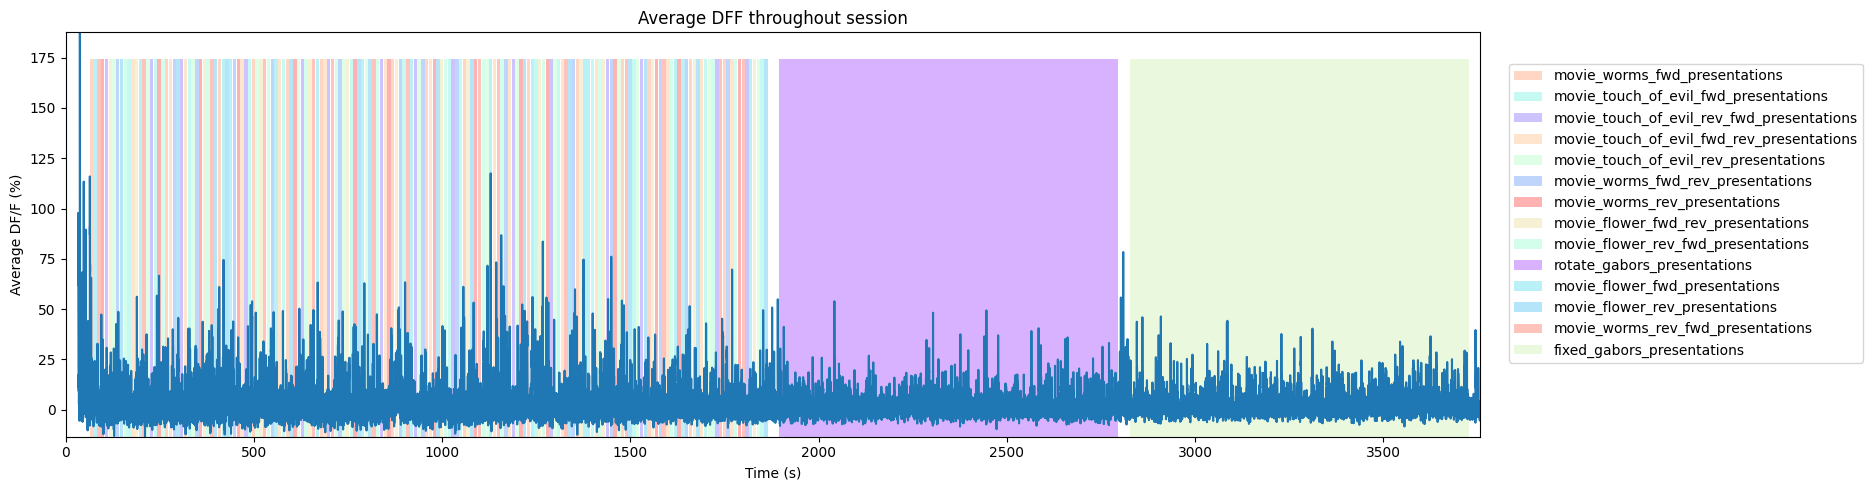

In [20]:
%matplotlib inline
### make plot of chosen fluorescence trace over time with colored epoch sections

fig, ax = plt.subplots(figsize=(15,5))

# filter epochs which aren't at least partially in the time window
bounded_epochs = {epoch for epoch in epochs if epoch[2] < time_end and epoch[3] > time_start}

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in bounded_epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
y_hi = np.amax(display_trace) # change these to manually set height of the plot
y_lo = np.amin(display_trace)
# draw colored rectangles for each epoch
for epoch in bounded_epochs:
    stim_name, stim_block, epoch_start, epoch_end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, y_lo), epoch_end-epoch_start, y_hi, alpha=0.3, facecolor=color))
    epoch_key[(stim_name)] = rec

ax.set_xlim(time_start, time_end)
ax.set_ylim(y_lo, y_hi)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Average DF/F (%)")
ax.set_title("Average DFF throughout session")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.25, 0.25))
ax.plot(dff_timestamps[:], display_trace)

print(np.amax(avg_dff_trace))
plt.tight_layout()
plt.show()

### Viewing Behavioral Data
Our NWB files also come with several metrics of animal behavior during the session, including running speed and eye tracking. Below is plotted the angle of the eye of the subject over time. The plot can be tailored to create the best view, as there are frequently large outliers in the eye tracking.

In [21]:
eye_tracking = nwb.acquisition["EyeTracking"]

In [22]:
# extract coords from eye tracking array
xs = np.array([point[0] for point in eye_tracking.eye_tracking.data])
ys = np.array([point[1] for point in eye_tracking.eye_tracking.data])

et_start_idx = 0
et_end_idx = len(eye_tracking.eye_tracking.data)
print("Min X:", np.nanmin(xs), "Max X:", np.nanmax(xs))
print("Min Y:", np.nanmin(ys), "Max Y:", np.nanmax(ys))

Min X: -2133.6747116929796 Max X: 380.65425645594405
Min Y: -5975.965894691784 Max Y: 460.3917121054316


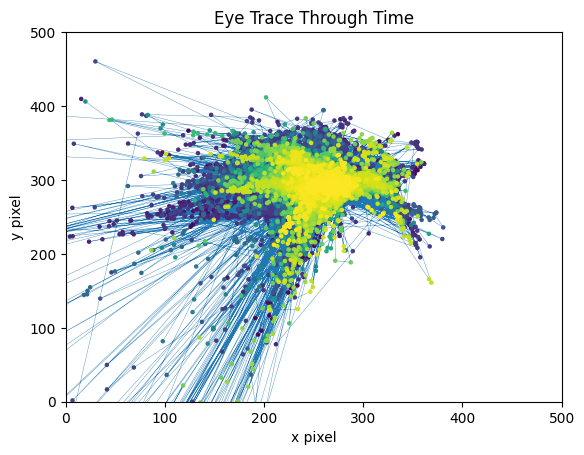

In [23]:
fig, ax = plt.subplots()
colors = plt.cm.viridis(np.linspace(0, 1, et_end_idx-et_start_idx))
ax.plot(xs[et_start_idx:et_end_idx], ys[et_start_idx:et_end_idx], zorder=0, linewidth=0.25)
ax.scatter(xs[et_start_idx:et_end_idx], ys[et_start_idx:et_end_idx], s=5, c=colors, zorder=1)

# change these to set the plot limits (there are sometimes unusual outliers)
ax.set_xlim(0,500)
ax.set_ylim(0,500)

ax.set_xlabel("x pixel")
ax.set_ylabel("y pixel")
ax.set_title("Eye Trace Through Time")
plt.show()

### Generating Response Windows

In [24]:
window_start_time = -2
window_end_time = 3
interp_hz = 10

In [25]:
# generate regularly-space x values and interpolate along it
time_axis = np.arange(dff_timestamps[0], dff_timestamps[-1], step=(1/interp_hz))
interp_dff = []

# interpolate channel by channel to save RAM
for channel in range(dff_trace.shape[1]):
    f = interpolate.interp1d(dff_timestamps, dff_trace[:,channel], axis=0, kind="nearest", fill_value="extrapolate")
    interp_dff.append(f(time_axis))

interp_dff = np.array(interp_dff)

print(interp_dff.shape)

(27, 39414)


In [26]:
# validate window bounds
if window_start_time > 0:
    raise ValueError("start time must be non-positive number")
if window_end_time <= 0:
    raise ValueError("end time must be positive number")
    
# get event windows
windows = []
window_length = int((window_end_time-window_start_time) * interp_hz)

for stim_ts in rev_stim_times:
    # convert time to index
    start_idx = int( (stim_ts + window_start_time - dff_timestamps[0]) * interp_hz )
    end_idx = start_idx + window_length
 
    # bounds checking
    if start_idx < 0 or end_idx > interp_dff.shape[1]:
        continue
        
    windows.append(interp_dff[:,start_idx:end_idx])
    
if len(windows) == 0:
    raise ValueError("There are no windows for these timestamps")

windows = np.array(windows) * 100 # x100 to convert values to dF/F percentage
neuronwise_windows = np.swapaxes(windows,0,1)

print(neuronwise_windows.shape)

(27, 15, 50)


### Showing Response Windows

In [27]:
%matplotlib inline
def show_dff_response(ax, dff, window_start_time, window_end_time, aspect="auto", vmin=None, vmax=None, yticklabels=[], skipticks=1, xlabel="Time (s)", ylabel="ROI", cbar=True, cbar_label=None):
    if len(dff) == 0:
        print("Input data has length 0; Nothing to display")
        return

    img = ax.imshow(dff, aspect=aspect, extent=[window_start_time, window_end_time, 0, len(dff)], vmin=vmin, vmax=vmax)
    if cbar:
        ax.colorbar(img, shrink=0.5, label=cbar_label)

    ax.plot([0,0],[0, len(dff)], ":", color="white", linewidth=1.0)

    if len(yticklabels) != 0:
        ax.set_yticks(range(len(yticklabels)))
        ax.set_yticklabels(yticklabels, fontsize=8)

        n_ticks = len(yticklabels[::skipticks])
        ax.yaxis.set_major_locator(plt.MaxNLocator(n_ticks))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [28]:
def show_many_responses(windows, rows, cols, window_idxs=None, title=None, subplot_title="", xlabel=None, ylabel=None, cbar_label=None, vmin=0, vmax=100):
    if window_idxs is None:
        window_idxs = range(len(windows))
    windows = windows[window_idxs]
    
    # handle case with no input data
    if len(windows) == 0:
        print("Input data has length 0; Nothing to display")
        return
    # handle cases when there aren't enough windows for number of rows
    if len(windows) < rows*cols:
        rows = (len(windows) // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols+2, 2*rows+2), layout="constrained")
    # handle case when there's only one row
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))
    
    for i in range(rows*cols):
        ax_row = int(i // cols)
        ax_col = i % cols
        ax = axes[ax_row][ax_col]
        
        if i > len(windows)-1:
            ax.set_visible(False)
            continue

        window = windows[i]
        show_dff_response(ax, window, window_start_time, window_end_time, xlabel=xlabel, ylabel=ylabel, cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(f"{subplot_title} {window_idxs[i]}")
        if ax_row != rows-1:
            ax.get_xaxis().set_visible(False)
        if ax_col != 0:
            ax.get_yaxis().set_visible(False)

    fig.suptitle(title)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axes, shrink=1.5/rows, label=cbar_label)

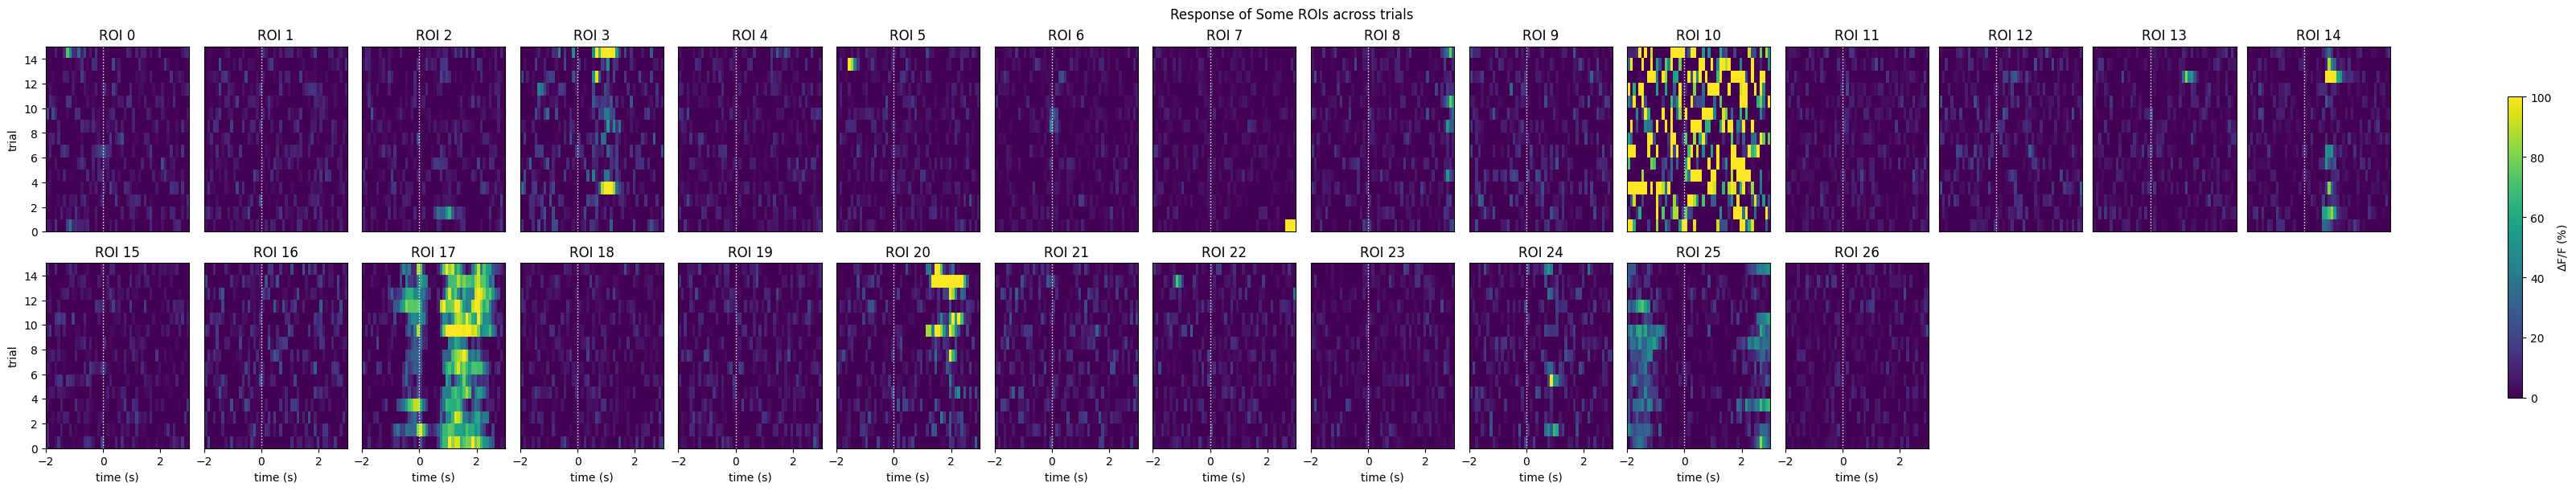

In [29]:
show_many_responses(neuronwise_windows,
                    6,
                    15,
                    title="Response of Some ROIs across trials",
                    subplot_title="ROI",
                    xlabel="time (s)",
                    ylabel="trial",
                    cbar_label="$\Delta$F/F (%)")

### Selecting Cells

In [30]:
# get the index within the window that stimulus occurs (time 0)
stimulus_onset_idx = int(-window_start_time * interp_hz)
baseline = windows[:,:,0:stimulus_onset_idx]
evoked_responses = windows[:,:,stimulus_onset_idx:]

print(stimulus_onset_idx)
print(baseline.shape)
print(evoked_responses.shape)

20
(15, 27, 20)
(15, 27, 30)


In [31]:
mean_trial_responses = np.mean(evoked_responses, axis=2)
mean_trial_baselines = np.mean(baseline, axis=2)

n = mean_trial_responses.shape[0]
t,p = ttest_ind(mean_trial_responses, mean_trial_baselines)
IC3_selected_rois = np.where(p < 0.05 / n)[0]
print(f"Selected ROIs {IC3_selected_rois}")

Selected ROIs [ 8 17]


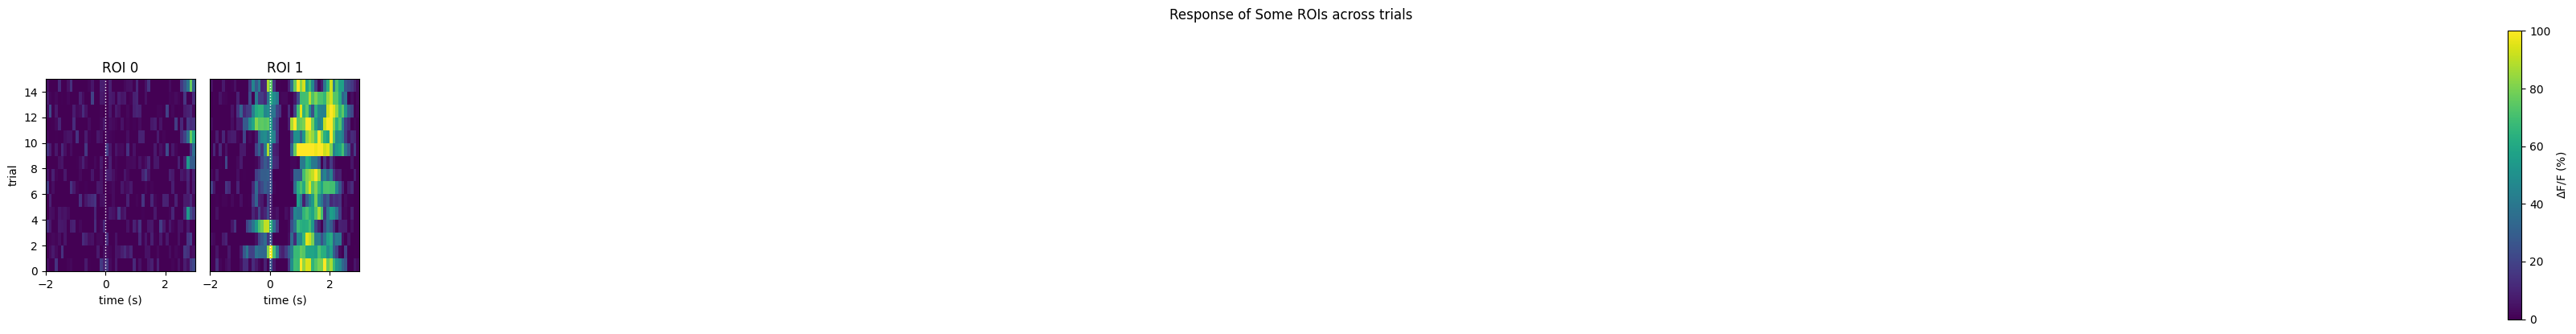

In [32]:
show_many_responses(neuronwise_windows[IC3_selected_rois],
                    6,
                    15,
                    title="Response of Some ROIs across trials",
                    subplot_title="ROI",
                    xlabel="time (s)",
                    ylabel="trial",
                    cbar_label="$\Delta$F/F (%)")

### Viewing Raw Movie
Although not shown in the metadata table shown above, each one of our session files comes with a copy on DANDI that also includes the actual movies from the brain.

In [33]:
# raw
dandi_movie_filepath = "sub-656228/sub-656228_ses-1245548523-acq-1245937736-raw-movies_image+ophys.nwb"
# denoised
# dandi_movie_filepath = "sub-656228/sub-656228_ses-1245548523-acq-1245937736-denoised-movies_ophys.nwb"

In [34]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_movie_filepath, download_loc)
nwb = io.read()

File already exists
Opening file


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.3.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [35]:
# start_time = flr_timestamps[0]
start_time = 540
# end_time = flr_timestamps[-1]
end_time = 600

In [36]:
start_idx, end_idx = np.searchsorted(dff_timestamps, [start_time, end_time])
print(start_idx)
print(end_idx)

4823
5394


In [37]:
raw_movie = nwb.acquisition["raw_suite2p_motion_corrected"].data
flr_timestamps = np.array(dff.roi_response_series["traces"].timestamps)

print(raw_movie.shape)
print(flr_timestamps.shape)

(37515, 512, 512)
(37515,)


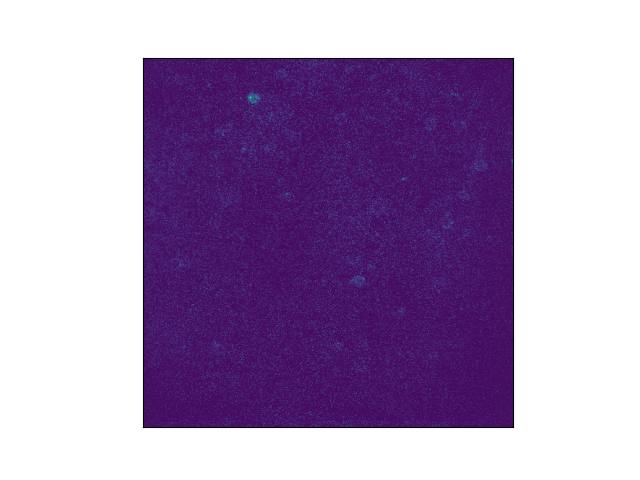

In [38]:
%matplotlib ipympl
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
view = hyperslicer(raw_movie[start_idx:end_idx], play_buttons=True)